In [3]:
!pip install pyplr
!pip install neurokit2
!pip install fastnumbers
!pip install datamatrix

import sys
sys.path.append("../Pupillengröße/Skripte/")

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log

import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))

You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


In [10]:
# reload checkdata
importlib.reload(checkdata)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ10_1_PLR1"
data_dir="/Users/Katharina/Desktop/Beispieldaten"
config=checkdata.DataConfig(window_duration=90)
eye0=checkdata.prepare(data_dir,subject_id,0,config)
eye1=checkdata.prepare(data_dir,subject_id,1,config)
# checkdata.plot(eye0[0],"auge 0 (0)")
# display(eye0[0])

### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

pandas.core.series.Series

<Axes: xlabel='pupil_timestamp'>

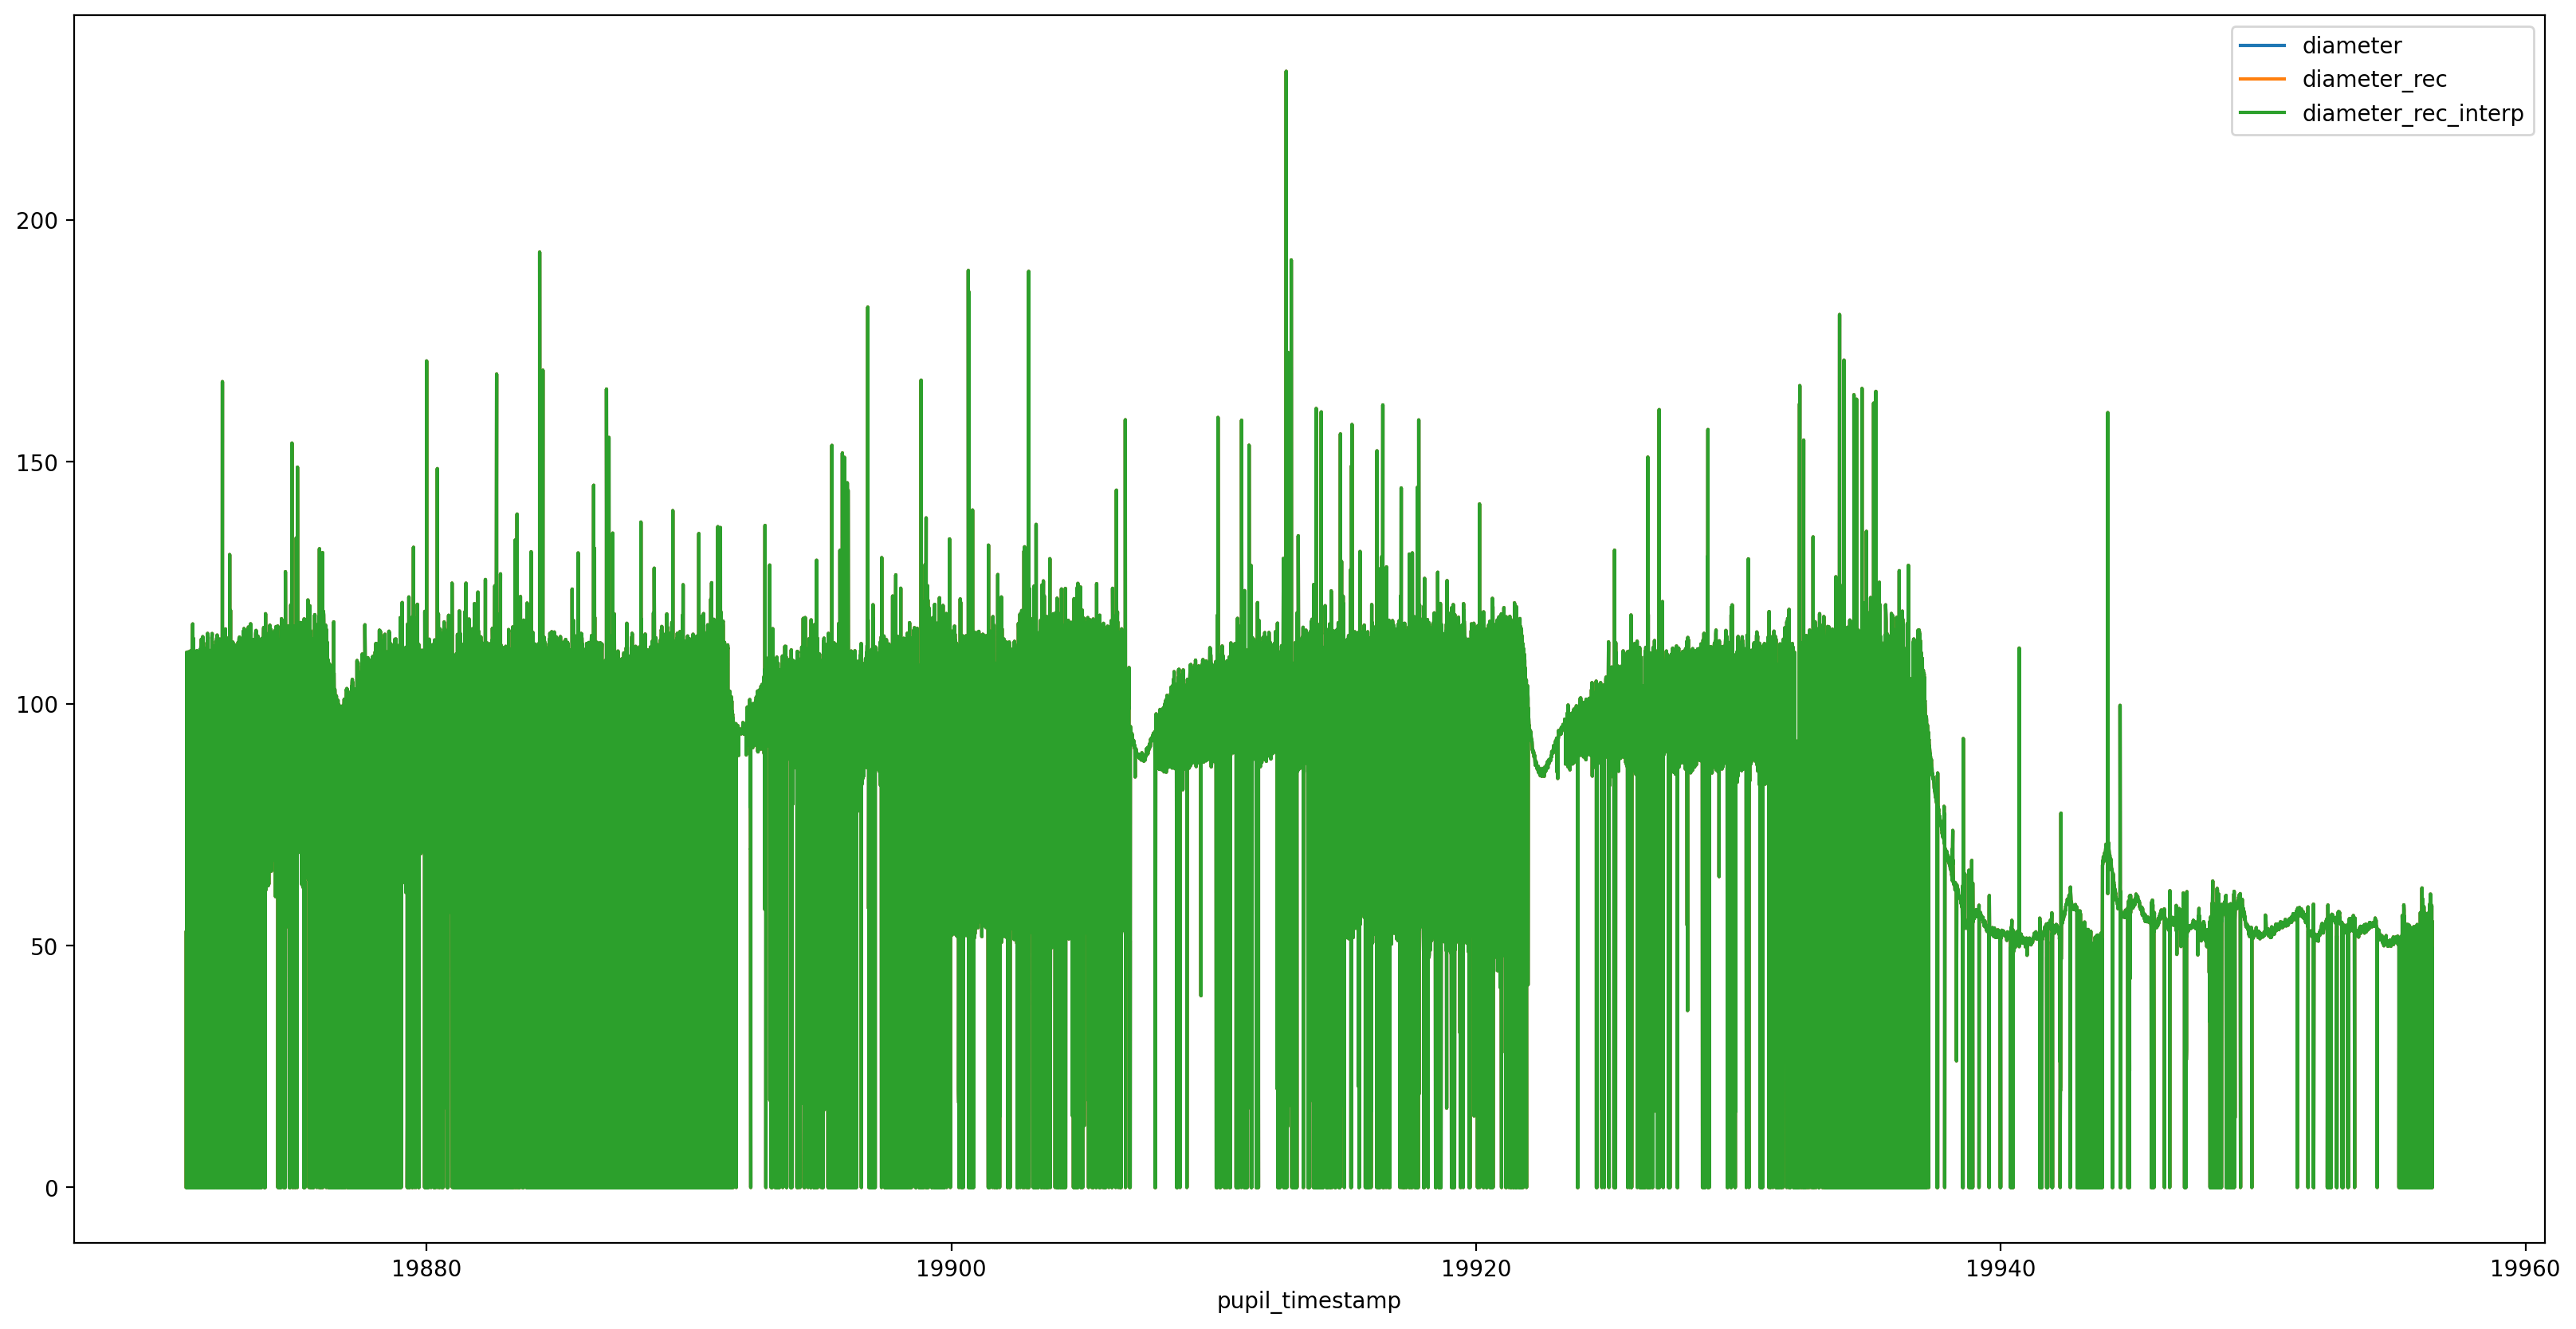

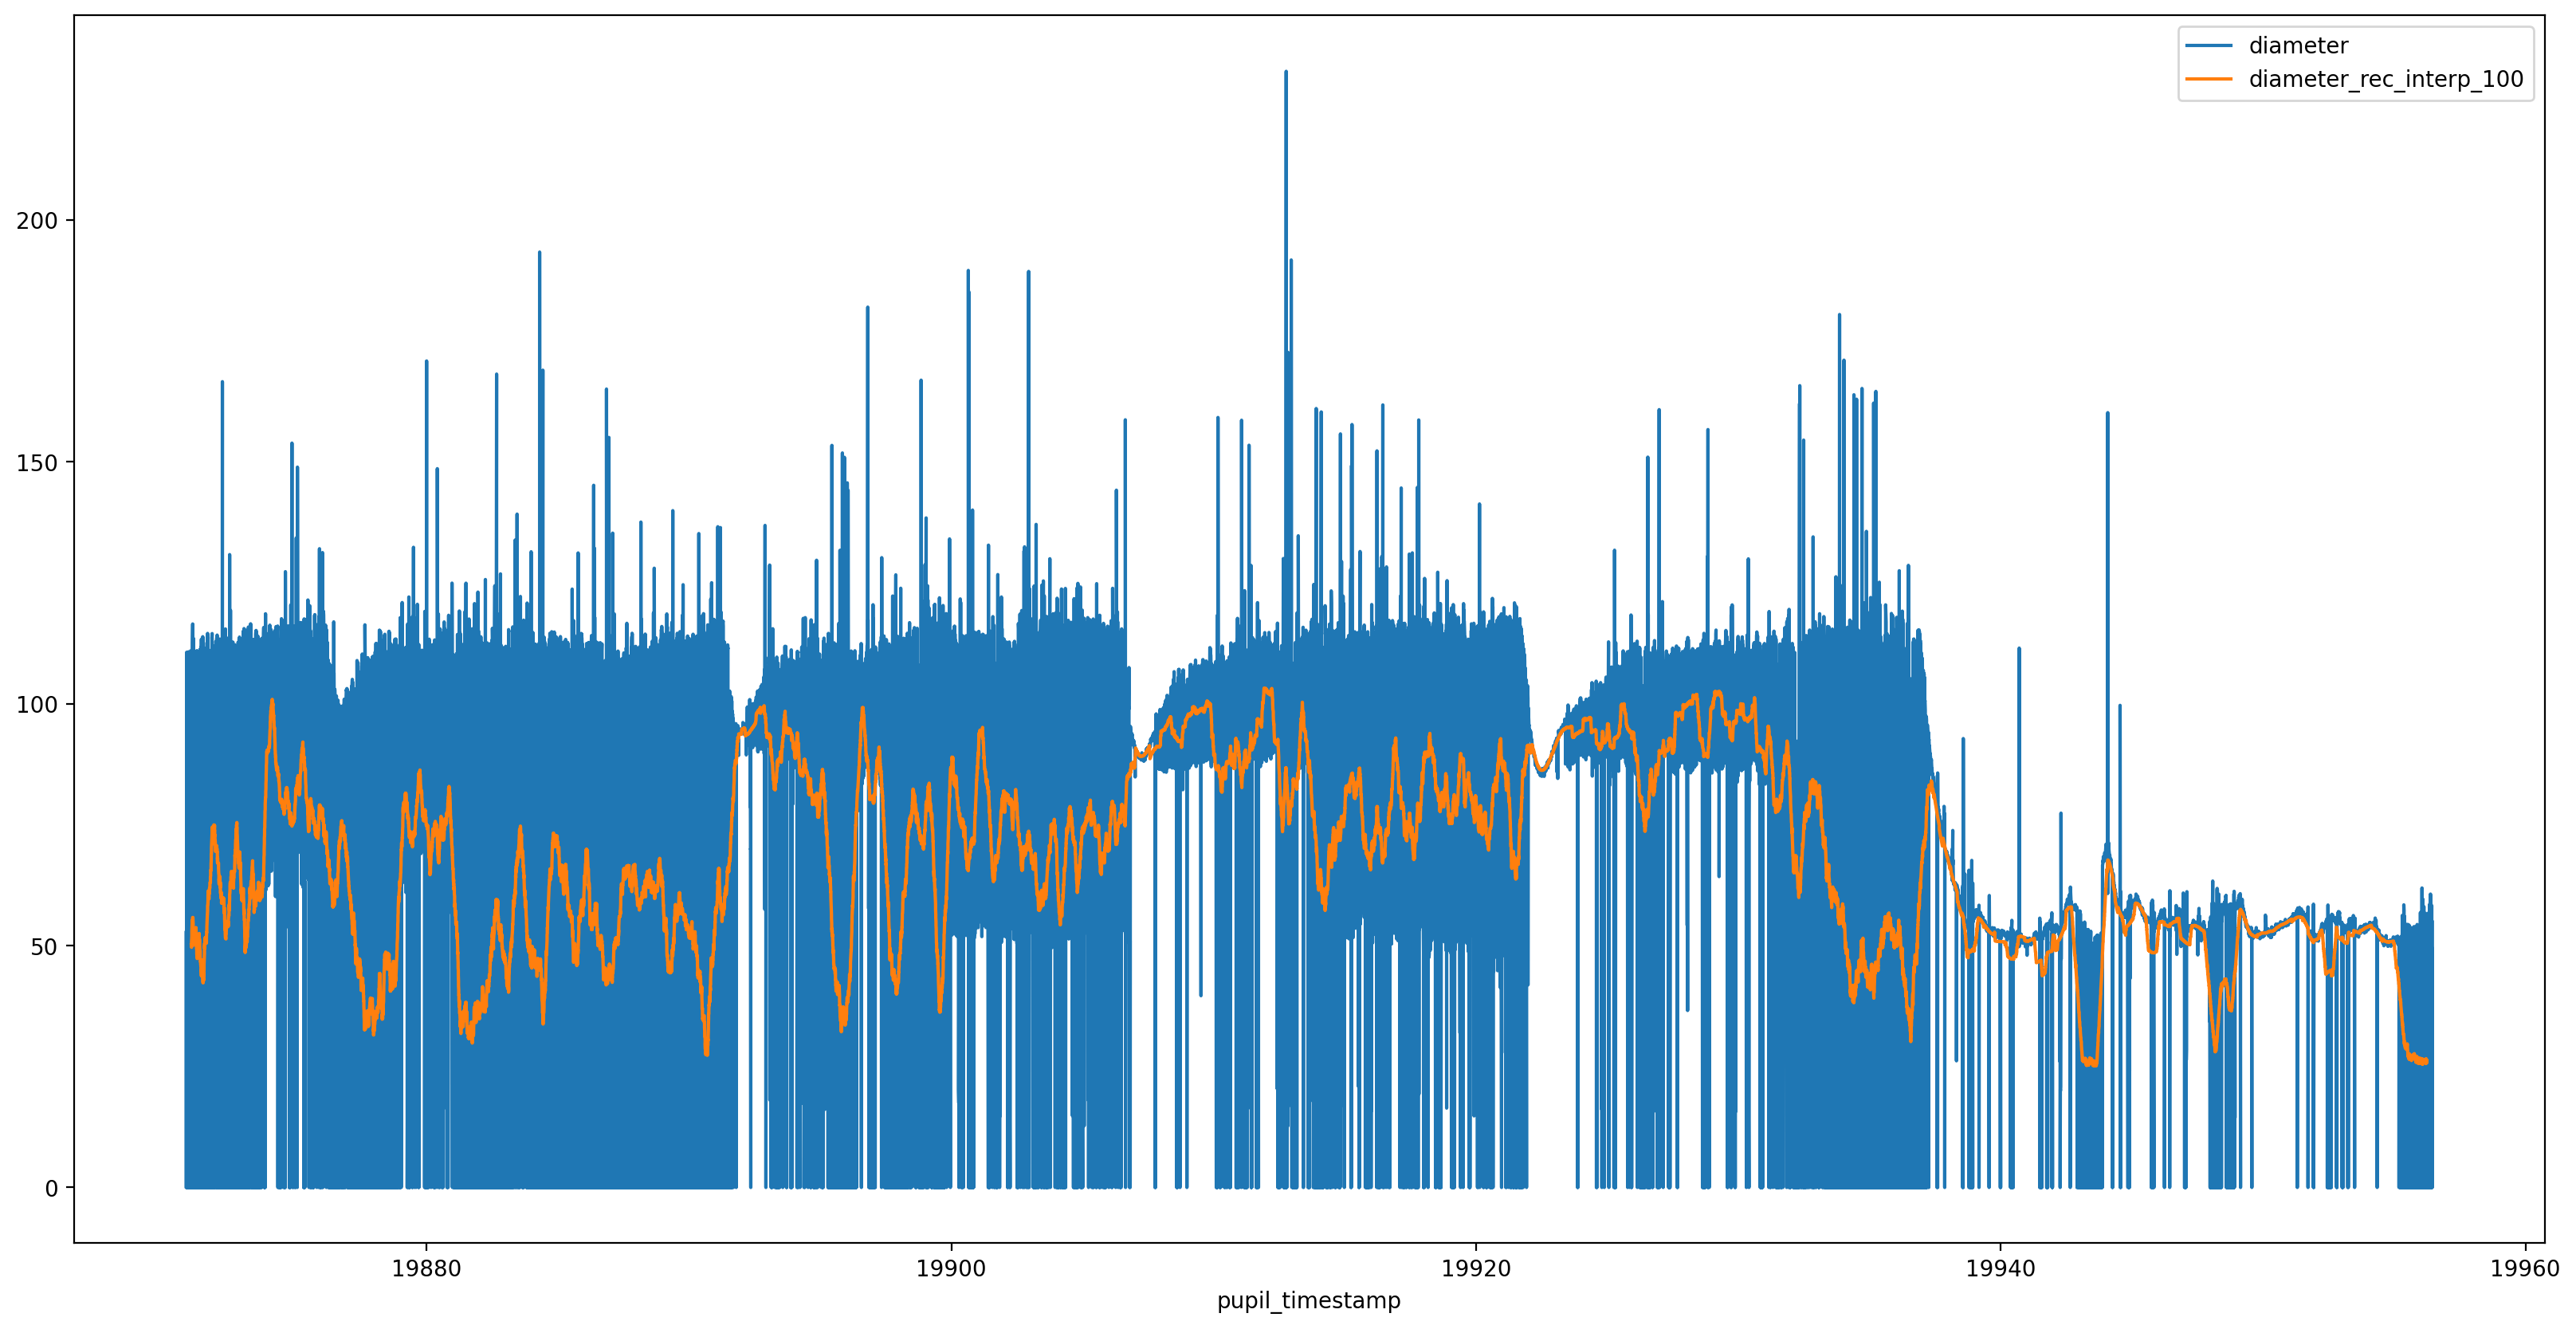

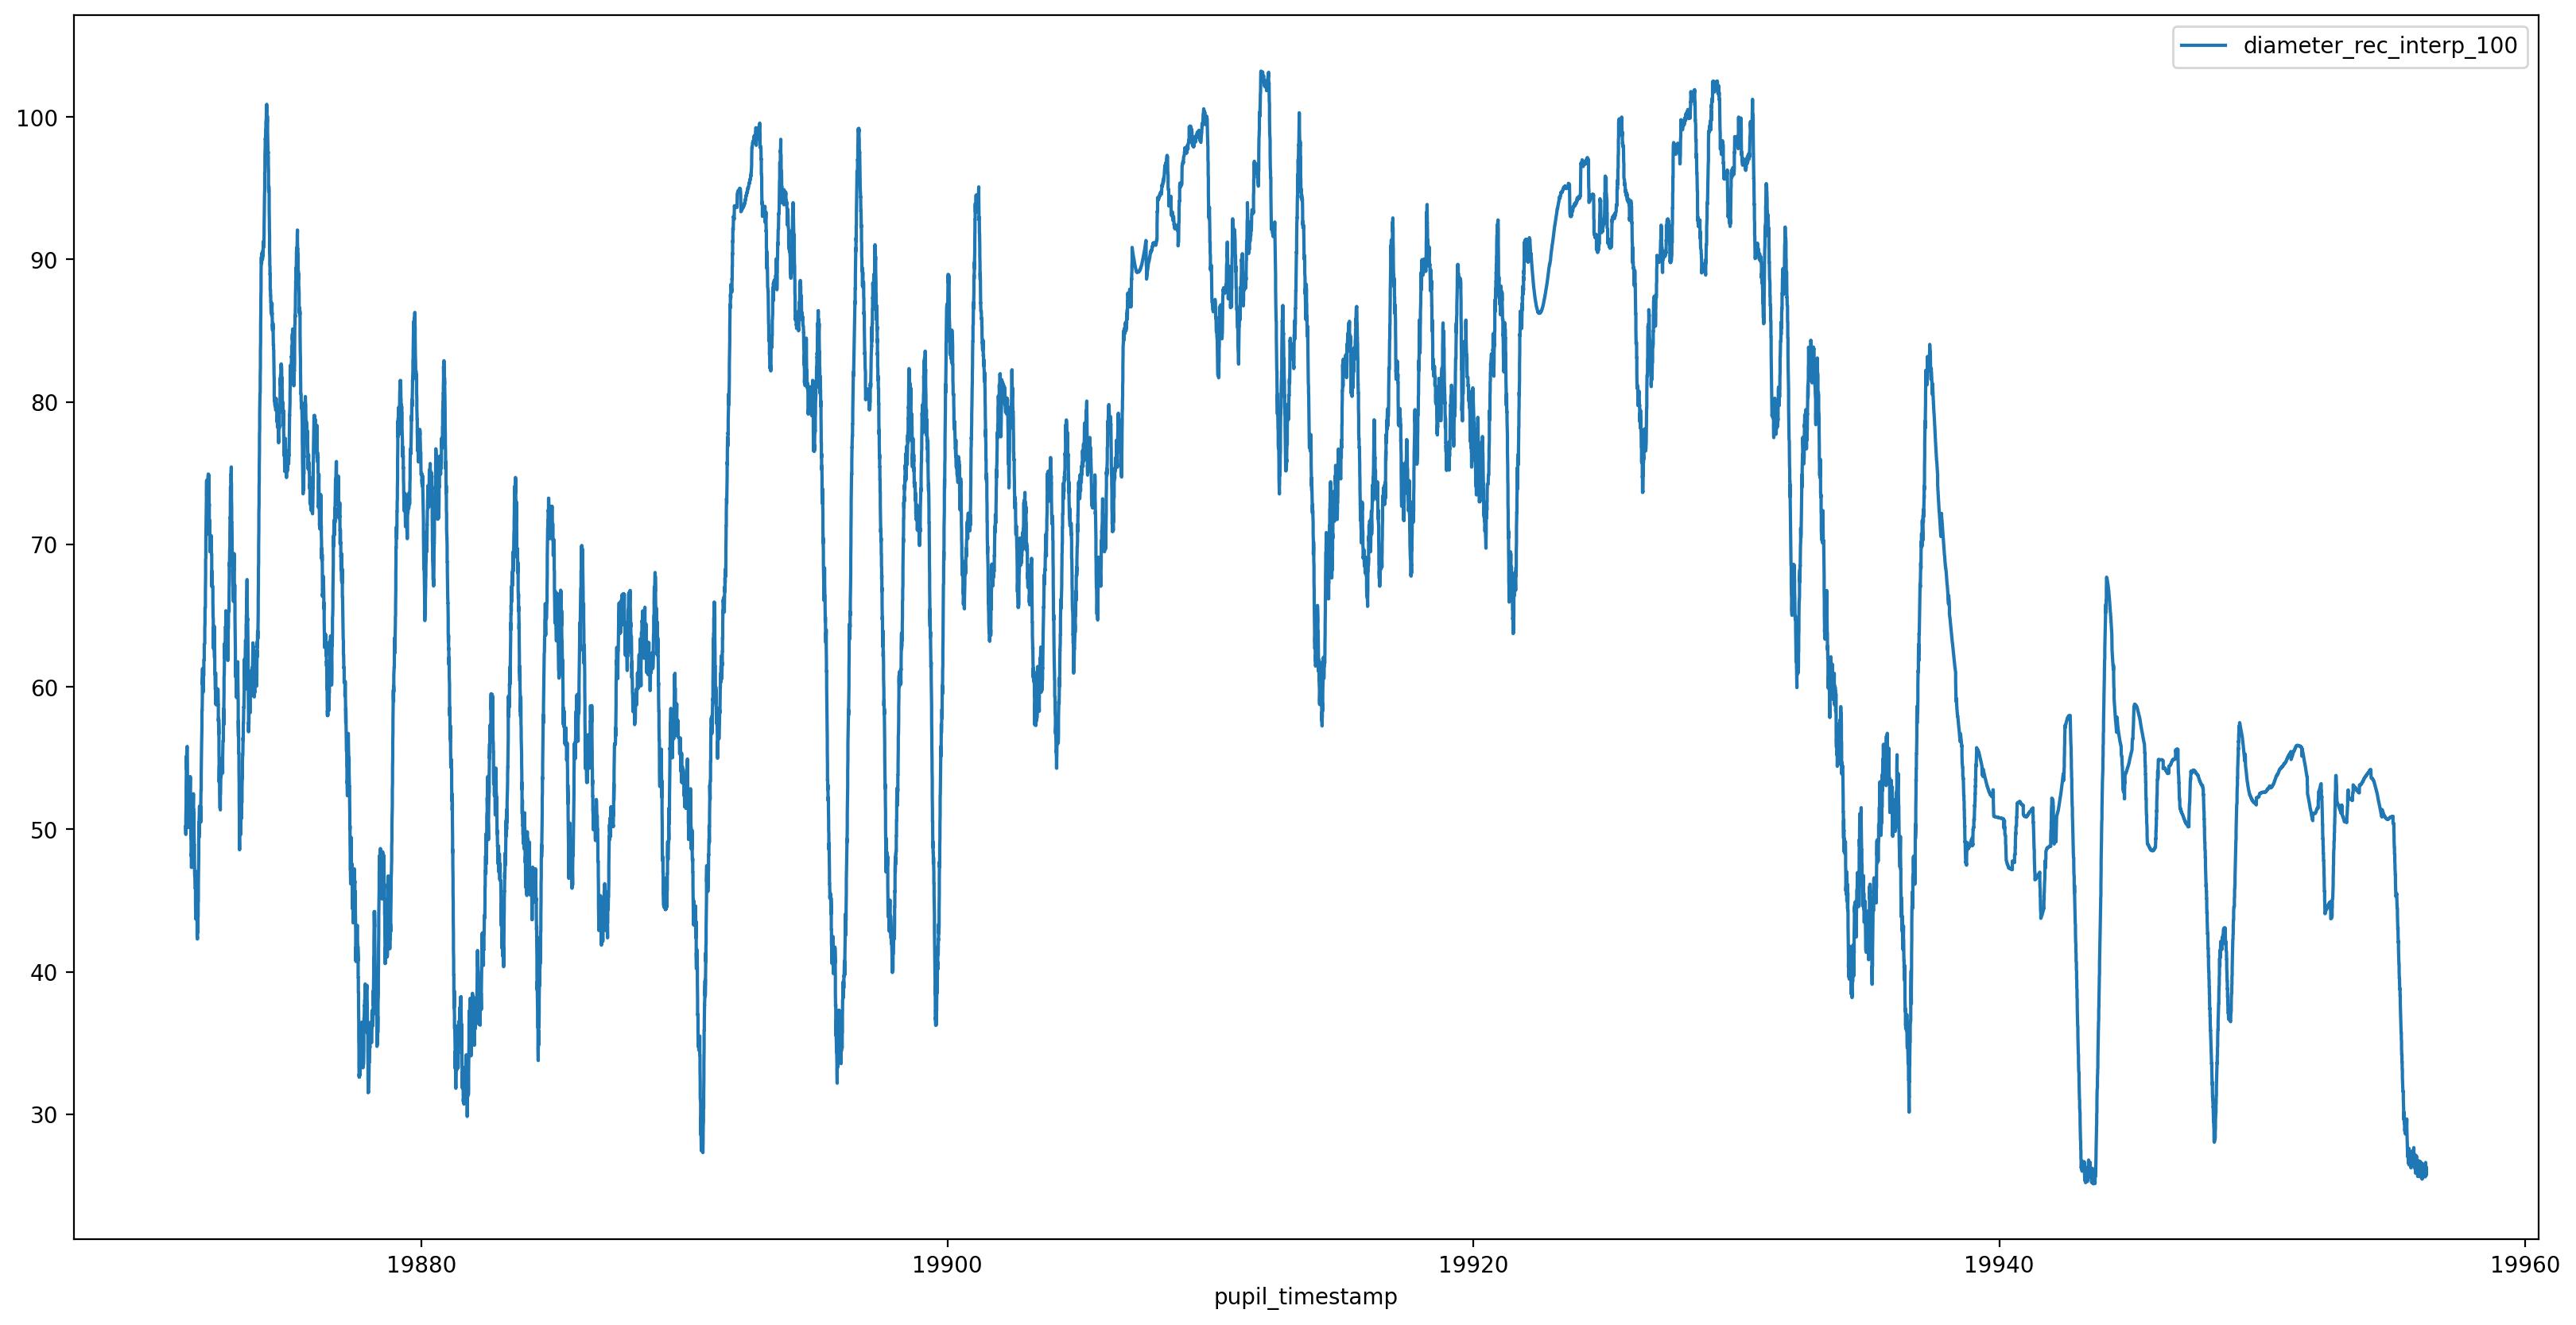

In [11]:
    importlib.reload(checkdata)
    # Let's try to remove blinks and filter the result
    what=eye0[0]

    def reconstruct(eye, window_size=100):
        # Remove blinks.
        eye['diameter_rec']=checkdata.blinkreconstruct(eye['diameter'], mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

    # How does it look like?
    eye=eye0[0]
    reconstruct(eye)

    sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
    sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
    eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp', kind='line')

    sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
    eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    # Make an extra plot to see how the smoothed data looks like
    eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')

In [244]:
# taking a subset of trials for illustrative purpose
subset = dm[150:170]

# applying baseline correction on the entire dm, such that `baseline_corrected`
# contains a series that starts from 0
baseline_corrected = srs.baseline(
    subset.ptrace_stream_mm, subset.ptrace_stream_mm, 0, 5)

# getting mean pupil size during the first 50 ms. We refer to this as
# baseline pupil size. Note that this is a single value (per trial), which is
# different from the baseline-corrected signal, which is a series (per trial).
dm.baseline = srs.reduce(dm.ptrace_stream_mm[:, 0:5])

# Plot original and baseline-corrected pupil size
fig, axs = plt.subplots(1, 2, figsize=(
    8, 5), constrained_layout=True, sharex=True, sharey=True)
fig.supxlabel('Time (ms)', color='black', fontsize=14)
fig.supylabel('Pupil size (mm)', color='black', fontsize=14)
plt.subplot(121)  # original
plt.title(r"$\bf{" + 'a) ' + "}$" + ' Original', fontsize=14, loc='left')
plt.plot(subset.ptrace_stream_mm.plottable)
plt.xlim(0, 300)
plt.ylim(-3, 5)
plt.subplot(122)  # baseline-corrected
plt.title(r"$\bf{" + 'b) ' + "}$" +
          ' Baseline-corrected', fontsize=14, loc='left')
plt.plot(baseline_corrected.plottable)
plt.xlim(0, 300)
plt.xticks(range(0, 301, 50), range(0, 3010, 500))
plt.ylim(-3, 5)


NameError: name 'dm' is not defined